In [6]:
#Importing library
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(227,227,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(6))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

# Compile Model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
activation_9 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 23, 23, 256)       1024      
_________________________________________________________________
activation_10 (Activation)   (None, 23, 23, 256)      

In [9]:
from sklearn.model_selection import train_test_split

data=np.load('images.npy')
target=np.load('target.npy')

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3)

# #Train-validation-test split
# x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3)

# #Dimension of the CIFAR10 dataset
# print((x_train.shape,y_train.shape))
# print((x_val.shape,y_val.shape))
# print((x_test.shape,y_test.shape))

In [10]:
# #Image Data Augmentation
# from keras.preprocessing.image import ImageDataGenerator

# train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

# val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

# test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

# #Fitting the augmentation defined above to the data
# train_generator.fit(x_train)
# val_generator.fit(x_val)
# test_generator.fit(x_test)

In [11]:
#Defining the parameters
batch_size= 250
epochs=20
learn_rate=0.01

In [12]:
#Training the model
hist = AlexNet.fit(
    x_train, y_train,
    epochs = epochs,
    steps_per_epoch = x_train.shape[0]//batch_size,
    validation_split=0.3,
    validation_steps = 250,
    verbose=1
)

Epoch 1/20
23/23 [==============================] - 162s 7s/step - loss: 0.8607 - accuracy: 0.7989 - val_loss: 1284.9492 - val_accuracy: 0.0624
Epoch 2/20
23/23 [==============================] - 159s 7s/step - loss: 0.3679 - accuracy: 0.9984 - val_loss: 350.6488 - val_accuracy: 0.0624
Epoch 3/20
23/23 [==============================] - 159s 7s/step - loss: 0.3386 - accuracy: 1.0000 - val_loss: 93.5969 - val_accuracy: 0.0624
Epoch 4/20
23/23 [==============================] - 159s 7s/step - loss: 0.3173 - accuracy: 0.9996 - val_loss: 29.8680 - val_accuracy: 0.0624
Epoch 5/20
23/23 [==============================] - 160s 7s/step - loss: 0.3005 - accuracy: 1.0000 - val_loss: 10.3141 - val_accuracy: 0.0624
Epoch 6/20
23/23 [==============================] - 160s 7s/step - loss: 0.2826 - accuracy: 1.0000 - val_loss: 4.7304 - val_accuracy: 0.0624
Epoch 7/20
23/23 [==============================] - 160s 7s/step - loss: 0.2675 - accuracy: 1.0000 - val_loss: 1.0179 - val_accuracy: 0.6010
Epoch

In [17]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

C:\Users\my\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


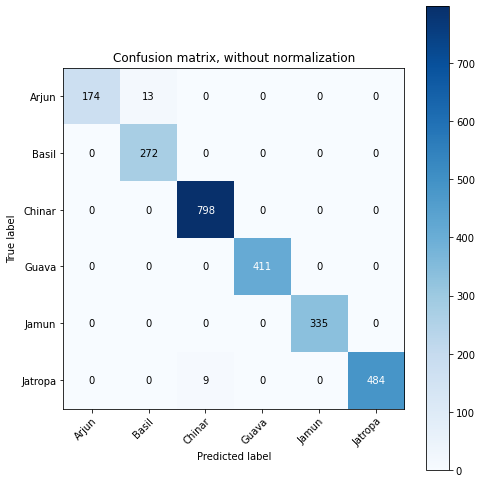

In [18]:
#Making prediction
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)


class_names=['Arjun', 'Basil', 'Chinar', 'Guava', 'Jamun', 'Jatropa', 'Lemon', 'Mango']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


In [19]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9911858974358975


In [25]:
from tensorflow import keras
from keras.models import model_from_json

# serialize model to JSON
model_json = AlexNet.to_json()
with open("Aayu-AlexNet.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
AlexNet.save_weights("Aayu-AlexNet-Weights.h5")

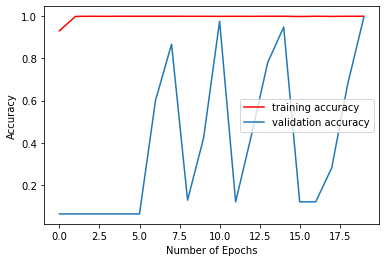

In [15]:
# Plot Graph
from matplotlib import pyplot as plt

plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

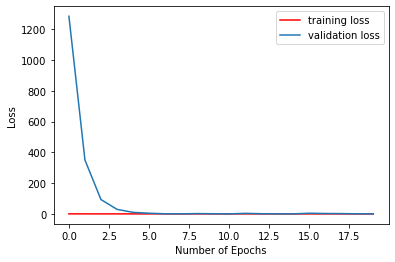

In [16]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()